## Stokes flow- channel 

In [1]:
# adapted code to be easily modifiable for different Np and wl 
# markersize is still not ideal

In [2]:
%matplotlib inline 
#render function in notebook 
import numpy as np
import matplotlib.pyplot as plt
import pystokes
from matplotlib.patches import Circle
from matplotlib.colors import LogNorm

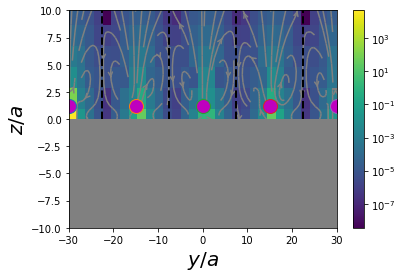

In [3]:
#Parameter declaration and memory allocations
a, eta, dim = 1, 1.0/6, 3
Ng = 32  #Ng size of grid length 
wl, h, Force =15, 1.2, 1

Np, Nt = 5, Ng*Ng  #Nt: grid
L = (((Np-1)/2)*wl)
r = np.zeros(3*Np) #position vector of particles 
p = np.zeros(3*Np) #orientation vector of particles 
F = np.zeros(3*Np) #forces on particles 
S = np.zeros(5*Np) #stresslets on particles  
D = np.zeros(3*Np) #potential dipoles on particles
rt = np.zeros(dim*Nt) # Memory Allocation for field points
vv = np.zeros(dim*Nt) # Memory Allocation for field Velocities

xx = np.linspace(-L, L, Ng) #Ng - integer
yy = np.linspace(-L, L, Ng)
X, Y = np.meshgrid(xx, yy) #created a mesh of xx and yy 
rt[Nt:3*Nt] = np.concatenate((X.reshape(Ng*Ng), Y.reshape(Ng*Ng))) #we're not plotting the x dimension 

#initialise

for i in range(Np): #y position of particles 
    r[i+Np]=(wl*i)-(((Np-1)/2)*wl) 

for i in range((2*Np), (3*Np)):  #z position of particles
    r[i]= h
    
for i in range((2*Np), (3*Np)): #forces on particles
    F[i]= Force
    
####Instantiate the Flow class
wFlow = pystokes.wallBounded.Flow(a, Np, eta, Nt)

# instantiate the force fields
ff = pystokes.forceFields.Forces(Np)

vv=vv*0
wFlow.flowField1s(vv, rt, r, F)
vx, vy, vz = vv[0:Nt].reshape(Ng, Ng), vv[Nt:2*Nt].reshape(Ng, Ng), vv[2*Nt:3*Nt].reshape(Ng, Ng) 


##Plotting
plt.figure()

# plot streamlines
plt.streamplot(X, Y, vy, vz, color="grey", density=1.5, arrowstyle='->', arrowsize =1)

# add other axes properties  #r[3], r
for i in range(Np):
    plt.plot(r[i+Np], r[i+2*Np], marker='o', markerfacecolor= "m", markersize= 70/Np )   # plot the particle at r

plt.xlim([-L, L]); plt.ylim([-10,10])
yll = np.linspace(0, L, 16)

for i in range (-Np,Np,2):
    plt.plot(i*wl*0.5+(yll*0), yll, 'k--', lw=2)
    
plt.axhspan(-L, 0, facecolor='0.5', alpha=1); 
plt.xlabel(r'$y/a$', fontsize=20); plt.ylabel(r'$z/a$', fontsize=20);

spd = vy*vy + vz*vz
plt.pcolor(X, Y, spd, norm=LogNorm(vmin=spd.min(), vmax=spd.max()))
plt.colorbar() 